# Michael Vazquez<br>Econ 570, Assignment 1<br>Link to code: https://github.com/Vazquez-Michael-V/570_homework/blob/main/assignment_1/assignment_1.ipynb

# Imports.

In [79]:
import pandas as pd
import numpy as np
import scipy.stats

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import os

from IPython import get_ipython
from IPython.display import Image, display




In [80]:
%matplotlib inline

# Functions.

In [81]:
def summary_statistics(df: pd.DataFrame, stats_col_name: str, date_col_name: str) -> dict:

    """
    Use this function to find the summary statistics discussed in the slides, "Lecture2_SP2026.pdf".

    Parameters
    ----------
    df : pd.DataFrame
        Passed DataFrame containing stats_col_name and date_col_name.
    stats_col_name : str
        Column on which to calculate the summary statistics.
    date_col_name : str
        Column on which to find min and max date.

    Returns
    -------
    dict
        Key 'df_summary_stats' contains the DataFrame of summary statistics.
        Key 'min_date' is the minimum of date_col_name.
        Key 'max_date' is the maximum of date_col_name.

    """

    df_summary_stats = pd.DataFrame(
    data={
        'mean': [df[stats_col_name].mean()],
        'median': [df[stats_col_name].median()],
        'var': [df[stats_col_name].var()],
        'std_dev': [df[stats_col_name].std()],
        'skewness': [df[stats_col_name].skew()],
        'kurtosis': [df[stats_col_name].kurtosis()]
        }
    ).T\
    .reset_index(names='statistic')\
    .rename(columns={0: 'value'}, errors='raise')\
    .round(4)

    return {
        'df_summary_stats': df_summary_stats,
        'min_date': df[date_col_name].min(),
        'max_date': df[date_col_name].max()
        }


# Notebook variables.

In [82]:
assignment_1_dir = os.getenv("ECON_570_ASSIGNMENT_1_DIR")
assignment_1_images_dir = os.getenv("ECON_570_ASSIGNMENT_1_IMAGES_DIR")


# Question 1.0 - Download and prep data on Industrial Production, IP.

## INDPRO data downloaded from FRED, no edits to data before download:<br>https://fred.stlouisfed.org/series/INDPRO#

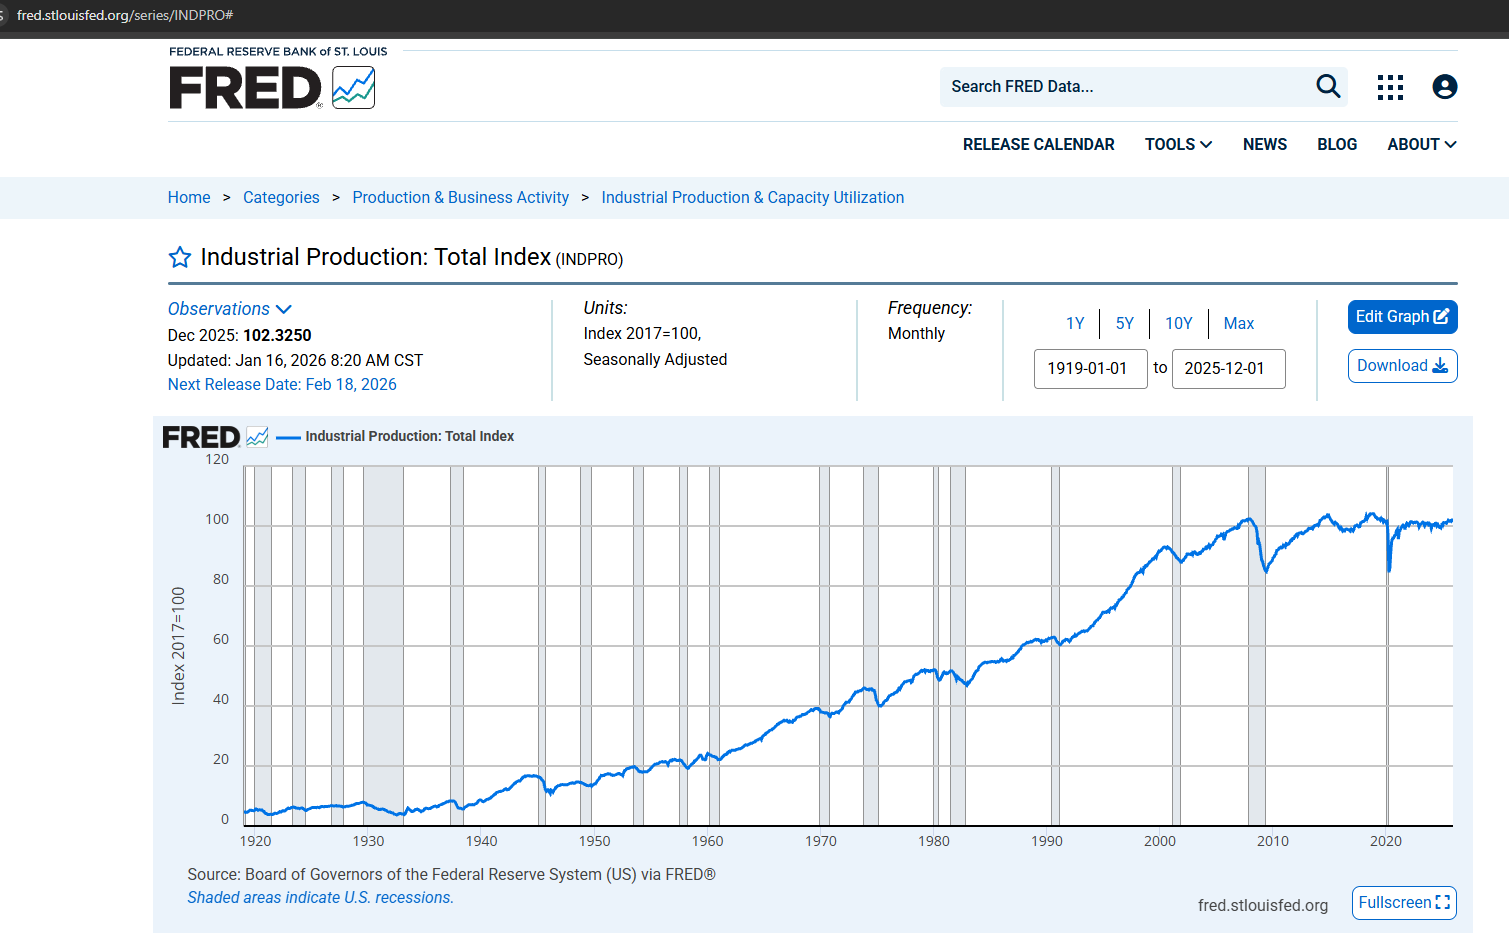

In [83]:
display(Image(rf'{assignment_1_images_dir}\\fred_indpro_download.png'))

## Read the downloaded INDPRO csv and assign dtypes.

In [84]:
df_indpro = pd.read_csv(rf"{assignment_1_dir}\\INDPRO.csv")
df_indpro['observation_date'] = pd.to_datetime(df_indpro['observation_date'])
df_indpro = df_indpro.rename(columns={'INDPRO': 'indpro'})

print(df_indpro.info())
print(f"df_indpro shape: {df_indpro.shape}")
print("Successfully read INDPRO file.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1284 entries, 0 to 1283
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   observation_date  1284 non-null   datetime64[ns]
 1   indpro            1284 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 20.2 KB
None
df_indpro shape: (1284, 2)
Successfully read INDPRO file.


## Add additional timeframe columns.

In [85]:
df_indpro = df_indpro.assign(
    year_quarter = pd.PeriodIndex(
        df_indpro['observation_date'],
        freq='Q'
    ),
    year_month = df_indpro['observation_date'].dt.strftime("%Y%m").astype('int64')
)

print(df_indpro.info())
print(f"df_indpro shape: {df_indpro.shape}")
print("Additional timeframe columns have been assigned.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1284 entries, 0 to 1283
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   observation_date  1284 non-null   datetime64[ns]
 1   indpro            1284 non-null   float64       
 2   year_quarter      1284 non-null   period[Q-DEC] 
 3   year_month        1284 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), period[Q-DEC](1)
memory usage: 40.3 KB
None
df_indpro shape: (1284, 4)
Additional timeframe columns have been assigned.


## Sort df_indpro by observation_date ascending.

In [86]:
df_indpro = df_indpro.sort_values(by=['observation_date']).reset_index(drop=True)

## Display some rows of df_indpro.

In [87]:
display(df_indpro.sample(n=10))

,observation_date,indpro,year_quarter,year_month
503,1960-12-01,22.1344,1960Q4,196012
888,1993-01-01,64.5978,1993Q1,199301
410,1953-03-01,19.4686,1953Q1,195303
711,1978-04-01,50.0206,1978Q2,197804
92,1926-09-01,6.7588,1926Q3,192609
231,1938-04-01,5.7894,1938Q2,193804
172,1933-05-01,4.7392,1933Q2,193305
186,1934-07-01,5.1432,1934Q3,193407
874,1991-11-01,62.0871,1991Q4,199111
327,1946-04-01,11.7404,1946Q2,194604


# __ALL QUESTIONS__ - Create dictionaries for all 3 timeframes in the homework instructions.

In [88]:
# Let's organize variables in a dictionary to avoid confusion.
# tf for timeframe.

# Timeframe containing all dates in the downloaded INDPRO data.
tf_all_dict = {'df': df_indpro}
tf_all_dict = tf_all_dict | summary_statistics(tf_all_dict['df'], 'indpro', 'observation_date')
assert tf_all_dict['min_date'] == pd.Timestamp(1919, 1, 1), "Minimum date of all timeframe data is not 1919-01-01."
assert tf_all_dict['max_date'] == pd.Timestamp(2025, 12, 1), "Maximum date of all timeframe data is not 2025-12-01."


# Timeframe from 2000-01 to present.
tf_00s_dict = {'df': df_indpro.loc[(df_indpro['observation_date'].between('2000-01-01', '2025-12-31')), :].copy()}
tf_00s_dict = tf_00s_dict | summary_statistics(tf_00s_dict['df'], 'indpro', 'observation_date')
assert tf_00s_dict['min_date'] == pd.Timestamp(2000, 1, 1), "Minimum date of the 00s data is not 2000-01-01."
assert tf_00s_dict['max_date'] == pd.Timestamp(2025, 12, 1), "Maximum date of the 00s data is not 2025-12-01."


# Timeframe from 2020-06 to present.
tf_20s_dict = {'df': df_indpro.loc[(df_indpro['observation_date'].between('2020-06-01', '2025-12-31')), :].copy()}
tf_20s_dict = tf_20s_dict | summary_statistics(tf_20s_dict['df'], 'indpro', 'observation_date')
assert tf_20s_dict['min_date'] == pd.Timestamp(2020, 6, 1), "Minimum date of the 20s data is not 2020-06-01."
assert tf_20s_dict['max_date'] == pd.Timestamp(2025, 12, 1), "Maximum date of the 20s data is not 2025-12-01."


display(tf_all_dict['df']['observation_date'].describe())
display(tf_00s_dict['df']['observation_date'].describe())
display(tf_20s_dict['df']['observation_date'].describe())


count                             1284
mean     1972-06-16 02:01:07.289719632
min                1919-01-01 00:00:00
25%                1945-09-23 12:00:00
50%                1972-06-16 00:00:00
75%                1999-03-08 18:00:00
max                2025-12-01 00:00:00
Name: observation_date, dtype: object

count                              312
mean     2012-12-15 17:23:04.615384576
min                2000-01-01 00:00:00
25%                2006-06-23 12:00:00
50%                2012-12-16 12:00:00
75%                2019-06-08 12:00:00
max                2025-12-01 00:00:00
Name: observation_date, dtype: object

count                               67
mean     2023-03-02 08:57:18.805970176
min                2020-06-01 00:00:00
25%                2021-10-16 12:00:00
50%                2023-03-01 00:00:00
75%                2024-07-16 12:00:00
max                2025-12-01 00:00:00
Name: observation_date, dtype: object

# Question 1.1, 1.2, and 1.3 - Summary statistics and plots.

## Question 1.1 - Summary statistics from 1919-01 to 2025-12.

In [89]:
print(f"INDPRO summary statistics, timeframe from {tf_all_dict['min_date'].strftime('%Y-%m')} to {tf_all_dict['max_date'].strftime('%Y-%m')}.")
display(tf_all_dict['df_summary_stats'])


INDPRO summary statistics, timeframe from 1919-01 to 2025-12.


,statistic,value
0,mean,46.7118
1,median,40.5312
2,var,1234.6693
3,std_dev,35.1379
4,skewness,0.3519
5,kurtosis,-1.3768


## Question 1.2 - Summary statistics from 2000-01 to 2025-12.

In [90]:
print(f"INDPRO summary statistics, timeframe from {tf_00s_dict['min_date'].strftime('%Y-%m')} to {tf_00s_dict['max_date'].strftime('%Y-%m')}.")
display(tf_00s_dict['df_summary_stats'])

INDPRO summary statistics, timeframe from 2000-01 to 2025-12.


,statistic,value
0,mean,97.2391
1,median,98.8828
2,var,22.4107
3,std_dev,4.7340
4,skewness,-0.7187
5,kurtosis,-0.5824


## Question 1.3 - Summary statistics from 2020-06 to 2025-12.

In [91]:
print(f"INDPRO summary statistics, timeframe from {tf_20s_dict['min_date'].strftime('%Y-%m')} to {tf_20s_dict['max_date'].strftime('%Y-%m')}.")
display(tf_20s_dict['df_summary_stats'])

INDPRO summary statistics, timeframe from 2020-06 to 2025-12.


,statistic,value
0,mean,100.0180
1,median,100.5726
2,var,3.5061
3,std_dev,1.8724
4,skewness,-2.2486
5,kurtosis,6.1790


# Question 1.4 - Plot the data.

## Boxplots for Question 1.

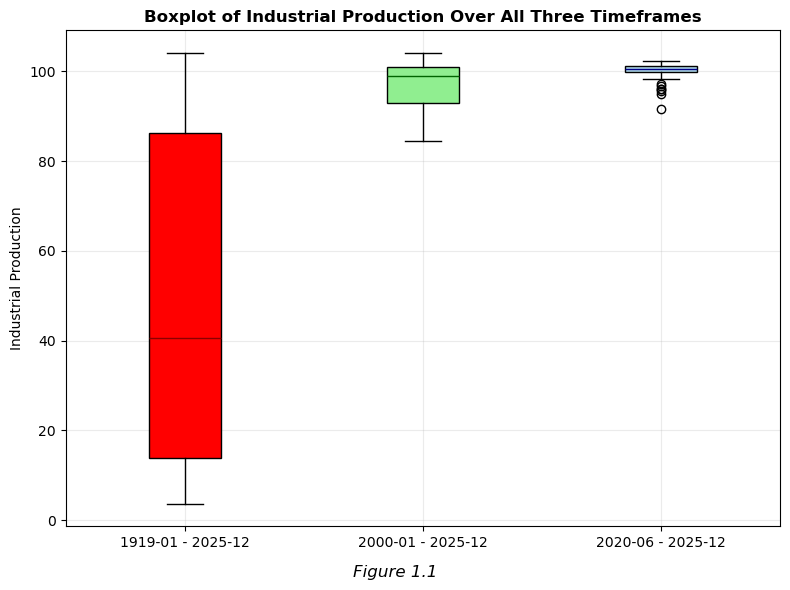

In [92]:
fig_box, ax_box = plt.subplots(figsize=(8, 6))

bp = ax_box.boxplot(
    [tf_all_dict['df']['indpro'], tf_00s_dict['df']['indpro'], tf_20s_dict['df']['indpro']],
    positions=[1, 2, 3],
    tick_labels=[
        f"{tf_all_dict['min_date'].strftime('%Y-%m')} - {tf_all_dict['max_date'].strftime('%Y-%m')}",
        f"{tf_00s_dict['min_date'].strftime('%Y-%m')} - {tf_00s_dict['max_date'].strftime('%Y-%m')}",
        f"{tf_20s_dict['min_date'].strftime('%Y-%m')} - {tf_20s_dict['max_date'].strftime('%Y-%m')}"
    ],
    patch_artist=True
)


box_colors = ['red', 'lightgreen', 'lightblue']
for patch, color in zip(bp['boxes'], box_colors):
    patch.set_facecolor(color)

median_colors = ['darkred', 'darkgreen', 'darkblue']
for median, color in zip(bp['medians'], median_colors):
    median.set_color(color)
    median.set_linewidth(1)


ax_box.set_ylabel('Industrial Production')
ax_box.set_title("Boxplot of Industrial Production Over All Three Timeframes", fontweight='bold')
ax_box.grid(True, alpha=0.25)

fig_box.text(0.5, 0.03, 'Figure 1.1', ha='center', fontsize=12, style='italic')

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()


## Line plots for Question 1.

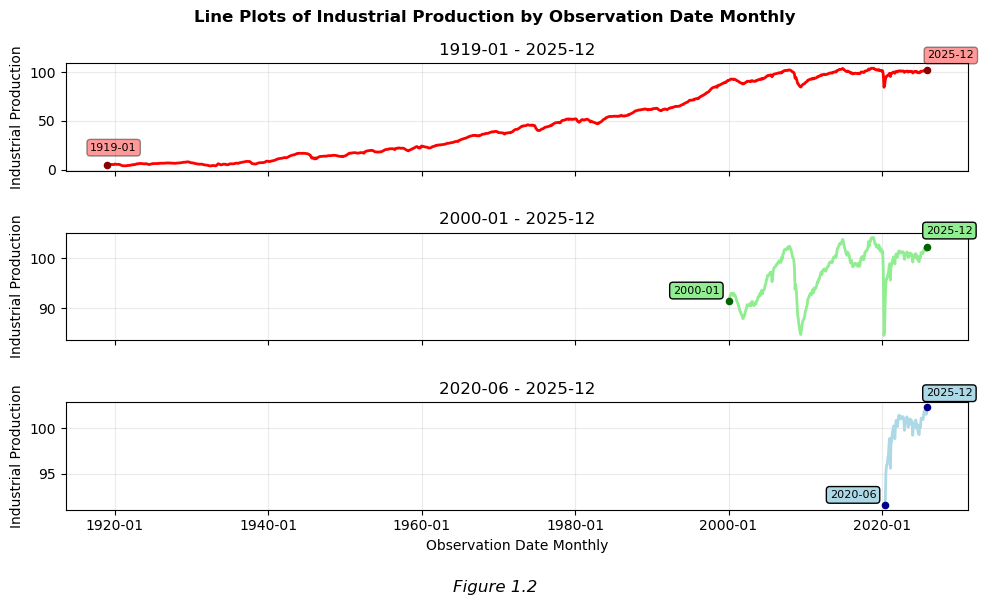

In [93]:
fig_lines, axes_lines = plt.subplots(nrows=3, ncols=1, figsize=(10, 6), sharex=True, sharey=False)

######################################################################
#### All dates, from 1919-01 to 2025-12. ####
axes_lines[0].plot(tf_all_dict['df']['observation_date'], tf_all_dict['df']['indpro'], label='all', color='red', linewidth=2)
axes_lines[0].set_title(f"{tf_all_dict['min_date'].strftime('%Y-%m')} - {tf_all_dict['max_date'].strftime('%Y-%m')}")
axes_lines[0].set_ylabel('Industrial Production')
axes_lines[0].grid(True, alpha=0.25)
# Annotate min and max dates.
# Annotate the min date.
axes_lines[0].scatter(tf_all_dict['min_date'], tf_all_dict['df']['indpro'].iloc[0], color='darkred', s=20, zorder=5)
axes_lines[0].annotate(
    tf_all_dict['min_date'].strftime('%Y-%m'),
    xy=(tf_all_dict['min_date'], tf_all_dict['df']['indpro'].min()),
    xytext=(-12, 11),
    textcoords='offset points',
    fontsize=8,
    bbox=dict(boxstyle='round,pad=0.3', facecolor='red', alpha=0.4)
)
# Annotate the max date.
axes_lines[0].scatter(tf_all_dict['max_date'], tf_all_dict['df']['indpro'].iloc[-1], color='darkred', s=20, zorder=5)
axes_lines[0].annotate(
    tf_all_dict['max_date'].strftime('%Y-%m'),
    xy=(tf_all_dict['max_date'], tf_all_dict['df']['indpro'].max()),
    xytext=(0, 7),
    textcoords='offset points',
    fontsize=8,
    bbox=dict(boxstyle='round,pad=0.3', facecolor='red', alpha=0.4)
)
######################################################################


######################################################################
#### 2000s, from 2000-01 to 2025-12 ####
axes_lines[1].plot(tf_00s_dict['df']['observation_date'], tf_00s_dict['df']['indpro'], label='2000s', color='lightgreen', linewidth=2)
axes_lines[1].set_title(f"{tf_00s_dict['min_date'].strftime('%Y-%m')} - {tf_00s_dict['max_date'].strftime('%Y-%m')}")
axes_lines[1].set_ylabel('Industrial Production')
axes_lines[1].grid(True, alpha=0.25)
# Annotate the min and max dates.
# Annotate the min date.
axes_lines[1].scatter(tf_00s_dict['min_date'], tf_00s_dict['df']['indpro'].iloc[0], color='darkgreen', s=20, zorder=5)
axes_lines[1].annotate(
    tf_00s_dict['min_date'].strftime('%Y-%m'),
    xy=(tf_00s_dict['min_date'], tf_00s_dict['df']['indpro'].iloc[0]),
    xytext=(-40, 5),
    textcoords='offset points',
    fontsize=8,
    bbox=dict(boxstyle='round,pad=0.3', facecolor='lightgreen', alpha=1)
)
# Annotate the max date.
axes_lines[1].scatter(tf_00s_dict['max_date'], tf_00s_dict['df']['indpro'].iloc[-1], color='darkgreen', s=20, zorder=5)
axes_lines[1].annotate(
    tf_00s_dict['max_date'].strftime('%Y-%m'),
    xy=(tf_00s_dict['max_date'], tf_00s_dict['df']['indpro'].iloc[0]),
    xytext=(-1, 48.2),
    textcoords='offset points',
    fontsize=8,
    bbox=dict(boxstyle='round,pad=0.3', facecolor='lightgreen', alpha=1)
)
######################################################################


######################################################################
#### 2020s, from 2020-06 to 2025-12 ####
axes_lines[2].plot(tf_20s_dict['df']['observation_date'], tf_20s_dict['df']['indpro'], label='2020s', color='lightblue', linewidth=2)
axes_lines[2].set_title(f"{tf_20s_dict['min_date'].strftime('%Y-%m')} - {tf_20s_dict['max_date'].strftime('%Y-%m')}")
axes_lines[2].set_ylabel('Industrial Production')
axes_lines[2].set_xlabel('Observation Date Monthly')
axes_lines[2].grid(True, alpha=0.25)
axes_lines[2].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
# Annotate the min and max dates.
# Annotate the min date. #
axes_lines[2].scatter(tf_20s_dict['min_date'], tf_20s_dict['df']['indpro'].iloc[0], color='darkblue', s=20, zorder=5)
axes_lines[2].annotate(
    tf_20s_dict['min_date'].strftime('%Y-%m'),
    xy=(tf_20s_dict['min_date'], tf_20s_dict['df']['indpro'].iloc[0]),
    xytext=(-40, 5),
    textcoords='offset points',
    fontsize=8,
    bbox=dict(boxstyle='round,pad=0.3', facecolor='lightblue', alpha=1)
)
# Annotate the max date.
axes_lines[2].scatter(tf_20s_dict['max_date'], tf_20s_dict['df']['indpro'].iloc[-1], color='darkblue', s=20, zorder=5)
axes_lines[2].annotate(
    tf_20s_dict['max_date'].strftime('%Y-%m'),
    xy=(tf_20s_dict['max_date'], tf_20s_dict['df']['indpro'].iloc[0]),
    xytext=(-1, 78.2),
    textcoords='offset points',
    fontsize=8,
    bbox=dict(boxstyle='round,pad=0.3', facecolor='lightblue', alpha=1)
)
######################################################################

fig_lines.suptitle("Line Plots of Industrial Production by Observation Date Monthly", fontweight='bold')
fig_lines.text(0.5, 0.01, 'Figure 1.2', ha='center', fontsize=12, style='italic')

plt.tight_layout(rect=[0, 0.05, 1, 1], h_pad=2.5)
plt.show()


## Histograms and KDE for Question 1.

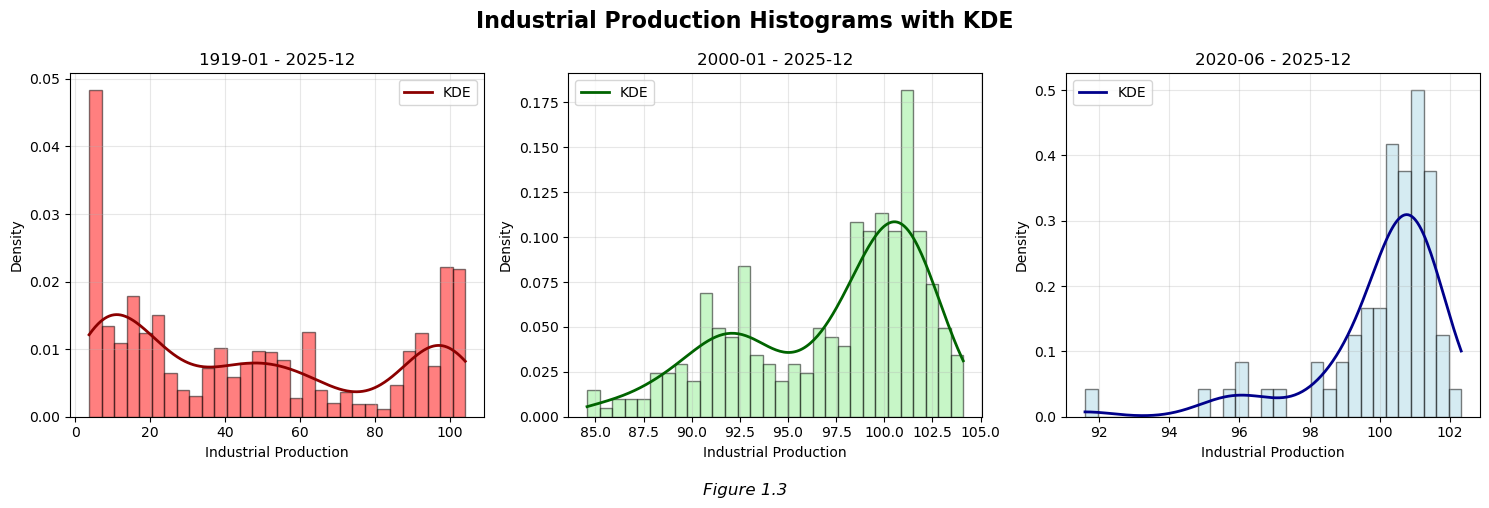

In [94]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))


######################################################################
#### All dates, from 1919-01 to 2025-12. ####
axes[0].hist(
    tf_all_dict['df']['indpro'],
    bins=30,
    color='red',
    alpha=0.5,
    edgecolor='black',
    density=True
)
kde_all = scipy.stats.gaussian_kde(tf_all_dict['df']['indpro'])
arr_all = np.linspace(
    tf_all_dict['df']['indpro'].min(),
    tf_all_dict['df']['indpro'].max(),
    500
)
axes[0].plot(arr_all, kde_all(arr_all), color='darkred', linewidth=2, label='KDE')
axes[0].set_title(f"{tf_all_dict['min_date'].strftime('%Y-%m')} - {tf_all_dict['max_date'].strftime('%Y-%m')}")
axes[0].set_xlabel('Industrial Production')
axes[0].set_ylabel('Density')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
######################################################################


######################################################################
#### 2000s, from 2000-01 to 2025-12 ####
axes[1].hist(
    tf_00s_dict['df']['indpro'],
    bins=30,
    color='lightgreen',
    alpha=0.5,
    edgecolor='black',
    density=True
)
kde_00s = scipy.stats.gaussian_kde(tf_00s_dict['df']['indpro'])
arr_00s = np.linspace(
    tf_00s_dict['df']['indpro'].min(),
    tf_00s_dict['df']['indpro'].max(),
    200
)
axes[1].plot(arr_00s, kde_00s(arr_00s), color='darkgreen', linewidth=2, label='KDE')
axes[1].set_title(f"{tf_00s_dict['min_date'].strftime('%Y-%m')} - {tf_00s_dict['max_date'].strftime('%Y-%m')}")
axes[1].set_xlabel('Industrial Production')
axes[1].set_ylabel('Density')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
######################################################################


######################################################################
#### 2020s, from 2020-06 to 2025-12 ####
axes[2].hist(tf_20s_dict['df']['indpro'], bins=30, color='lightblue', alpha=0.5, edgecolor='black', density=True)
kde_20s = scipy.stats.gaussian_kde(tf_20s_dict['df']['indpro'])
arr_20s = np.linspace(tf_20s_dict['df']['indpro'].min(), tf_20s_dict['df']['indpro'].max(), 200)
axes[2].plot(arr_20s, kde_20s(arr_20s), color='darkblue', linewidth=2, label='KDE')
axes[2].set_title(f"{tf_20s_dict['min_date'].strftime('%Y-%m')} - {tf_20s_dict['max_date'].strftime('%Y-%m')}")
axes[2].set_xlabel('Industrial Production')
axes[2].set_ylabel('Density')
axes[2].legend()
axes[2].grid(True, alpha=0.3)
######################################################################

fig.suptitle('Industrial Production Histograms with KDE', fontsize=16, fontweight='bold')
fig.text(0.5, 0.01, 'Figure 1.3', ha='center', fontsize=12, style='italic')

plt.tight_layout(rect=[0, 0.05, 1, 1], h_pad=2.5)
plt.show()

# Question 2.1 - Brief discussion of summary statistics and plots found in Question 1.

##### &nbsp;&nbsp;&nbsp;&nbsp;From the summary statistics and the plots, we can immediately see that the data in all three timeframes is not normally distributed. This is made most visually clear in Figure 1.3 when looking at the KDE curves. The summary statistics found in Questions 1.1 to 1.3 should align with what we see in the KDE curves of each respective timeframe.<br>&nbsp;&nbsp;&nbsp;&nbsp;In the timeframe from 1919-01 to 2025-12, indpro skewness is 0.3519 and kurtosis is -1.3768, which aligns with the slight right skew and small peaks on both sides of the red KDE.<br>&nbsp;&nbsp;&nbsp;&nbsp;For 2000-01 to 2025-12, indpro skewness is -0.7187 and kurtosis is -0.5824, which matches with the moderate left skew and two peaks towards the center of the lightgreen KDE.<br>&nbsp;&nbsp;&nbsp;&nbsp;For 2020-06 to 2025-12, indpro has skewness -2.2486 and kurtosis 6.179, as seen in the strong left skew and one large peak of the lightblue KDE.

# Question 2.2 - Great recession of 2008 and covid.

##### &nbsp;&nbsp;&nbsp;&nbsp; The green curve in Figure 1.2 captures the industrial production data over both the great recession of 2008 and covid. From the prolonged valley in the graph around 2008, we can see that industrial production took considerably longer to recover when compared to the decrease during the 2020 pandemic. The blue curve, 2020-06 to 2025-12, in Figure 1.2 shows industrial production rapidly growing at the start of the timeframe, again showing that industrial production recovered faster during the covid years than during the great recession years. In Figure 1.1, the blue boxplot displays several smaller points as outliers, another indication of how quickly industrial production recovered from the impact of covid.<br>&nbsp;&nbsp;&nbsp;&nbsp; In terms of forecasting and model fitting, we will have to consider how to handle the data with observation dates during and around 2008 and 2020.

# Question 3.0 Download and prep data on Personal Consumption Expediture, PCE.

## PCE data downloaded from FRED, no edits to data before download:<br>https://fred.stlouisfed.org/series/PCE

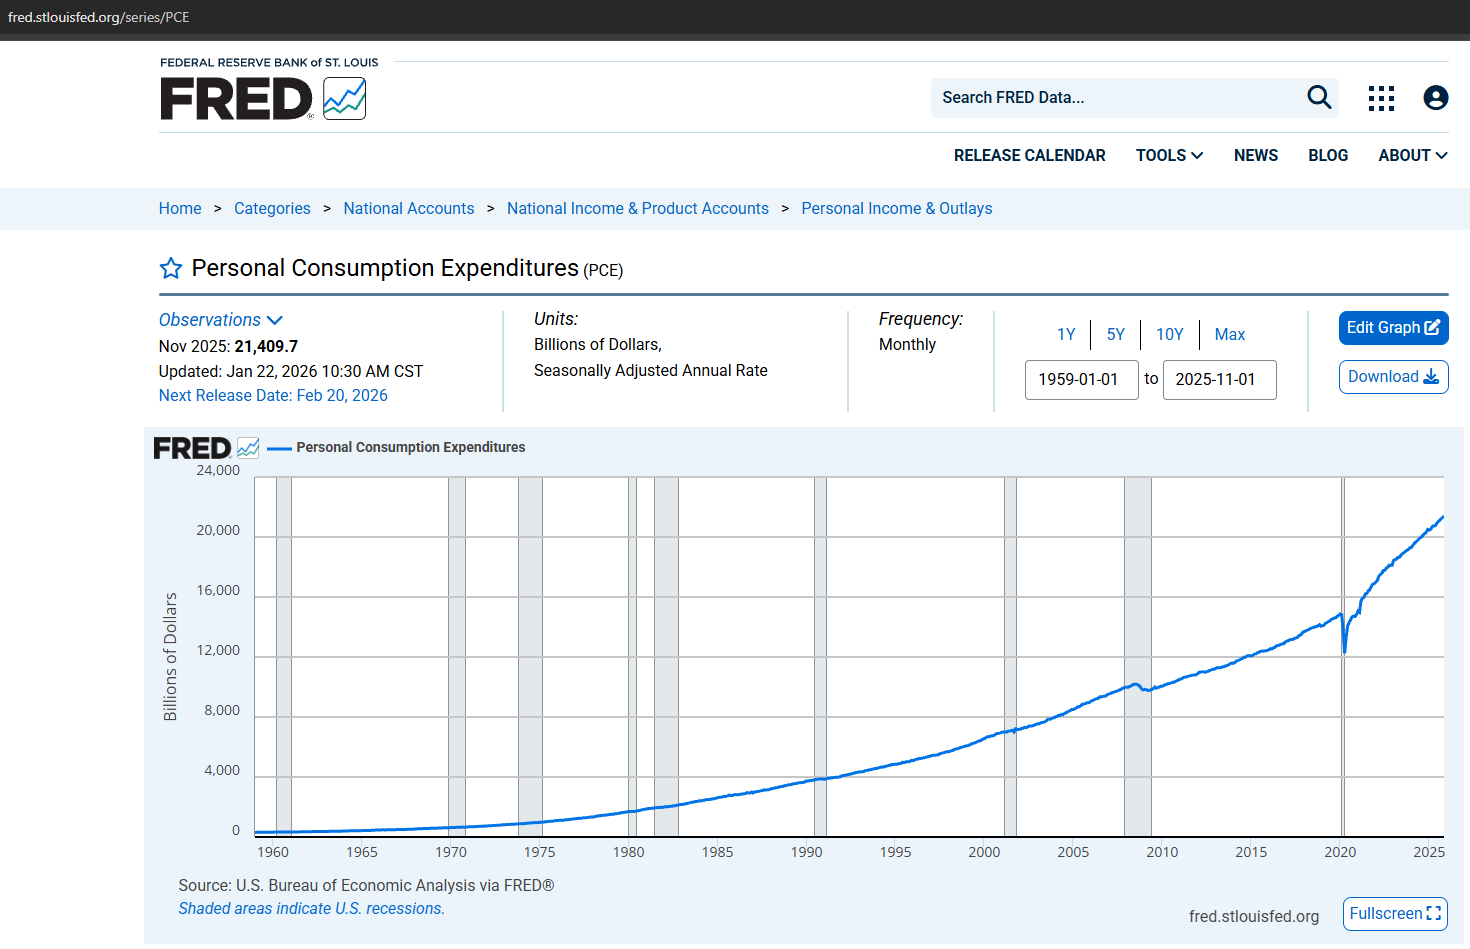

In [95]:
display(Image(rf'{assignment_1_images_dir}\\fred_pce_download.png'))

## Read the downloaded PCE csv and assign dtypes.

In [96]:
df_pce = pd.read_csv(rf"{assignment_1_dir}\\PCE.csv")
df_pce['observation_date'] = pd.to_datetime(df_pce['observation_date'])
df_pce = df_pce.rename(columns={'PCE': 'pce'})

print(df_pce.info())
print(f"df_pce shape: {df_pce.shape}")
print("Successfully read PCE file.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   observation_date  803 non-null    datetime64[ns]
 1   pce               803 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.7 KB
None
df_pce shape: (803, 2)
Successfully read PCE file.


## Add additional timeframe columns.

In [97]:
df_pce = df_pce.assign(
    year_quarter = pd.PeriodIndex(
        df_pce['observation_date'],
        freq='Q'
    ),
    year_month = df_pce['observation_date'].dt.strftime("%Y%m").astype('int64')
)

print(df_pce.info())
print(f"df_pce shape: {df_pce.shape}")
print("Additional timeframe columns have been assigned.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   observation_date  803 non-null    datetime64[ns]
 1   pce               803 non-null    float64       
 2   year_quarter      803 non-null    period[Q-DEC] 
 3   year_month        803 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1), period[Q-DEC](1)
memory usage: 25.2 KB
None
df_pce shape: (803, 4)
Additional timeframe columns have been assigned.


## Sort df_pce by observation_date ascending.

In [98]:
df_pce = df_pce.sort_values(by=['observation_date']).reset_index(drop=True)

## Display some rows of df_pce and statistics on the observation date.

In [99]:
display(df_pce.sample(n=10))
display(df_pce['observation_date'].describe())

,observation_date,pce,year_quarter,year_month
136,1970-05-01,642.4,1970Q2,197005
700,2017-05-01,13171.9,2017Q2,201705
254,1980-03-01,1708.2,1980Q1,198003
581,2007-06-01,9706.8,2007Q2,200706
393,1991-10-01,3976.0,1991Q4,199110
33,1961-10-01,346.5,1961Q4,196110
272,1981-09-01,1965.5,1981Q3,198109
576,2007-01-01,9538.7,2007Q1,200701
312,1985-01-01,2618.8,1985Q1,198501
654,2013-07-01,11372.6,2013Q3,201307


count                              803
mean     1992-05-31 20:46:19.576587776
min                1959-01-01 00:00:00
25%                1975-09-16 00:00:00
50%                1992-06-01 00:00:00
75%                2009-02-15 00:00:00
max                2025-11-01 00:00:00
Name: observation_date, dtype: object

# Question 3.1 - Summary statistics and plots.

## PCE summary statistics.

In [100]:
tf_pce_all_dict = {'df': df_pce} | summary_statistics(df_pce, 'pce', 'observation_date')

print(f"PCE summary statistics, timeframe from {tf_pce_all_dict['min_date'].strftime('%Y-%m')} to {tf_pce_all_dict['max_date'].strftime('%Y-%m')}")
display(tf_pce_all_dict['df_summary_stats'])

PCE summary statistics, timeframe from 1959-01 to 2025-11


,statistic,value
0,mean,6.022802e+03
1,median,4.177100e+03
2,var,3.101068e+07
3,std_dev,5.568723e+03
4,skewness,8.951000e-01
5,kurtosis,-1.607000e-01


## Boxplot of INDPRO and PCE.

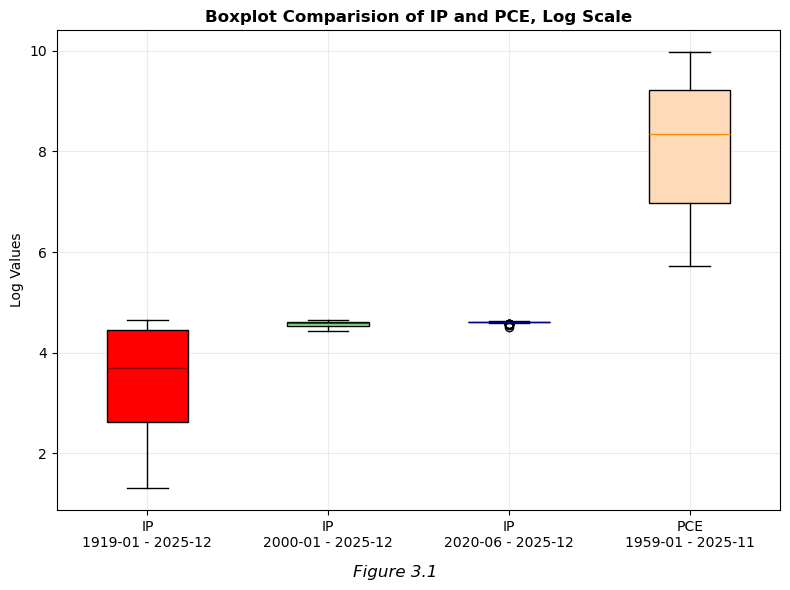

In [108]:
fig_box, ax_box = plt.subplots(figsize=(8, 6))

# Copy and paste the above boxplot code from question 1, then add in PCE.
bp = ax_box.boxplot(
    [
        np.log(tf_all_dict['df']['indpro']),
        np.log(tf_00s_dict['df']['indpro']),
        np.log(tf_20s_dict['df']['indpro']),
        np.log(tf_pce_all_dict['df']['pce'])
    ],
    positions=[1, 2, 3, 4],
    tick_labels=[
        f"IP\n{tf_all_dict['min_date'].strftime('%Y-%m')} - {tf_all_dict['max_date'].strftime('%Y-%m')}",
        f"IP\n{tf_00s_dict['min_date'].strftime('%Y-%m')} - {tf_00s_dict['max_date'].strftime('%Y-%m')}",
        f"IP\n{tf_20s_dict['min_date'].strftime('%Y-%m')} - {tf_20s_dict['max_date'].strftime('%Y-%m')}",
        f"PCE\n{tf_pce_all_dict['min_date'].strftime('%Y-%m')} - {tf_pce_all_dict['max_date'].strftime('%Y-%m')}"
    ],
    patch_artist=True
)


box_colors = ['red', 'lightgreen', 'lightblue', 'peachpuff']
for patch, color in zip(bp['boxes'], box_colors):
    patch.set_facecolor(color)

median_colors = ['darkred', 'darkgreen', 'darkblue', 'darkorange']
for median, color in zip(bp['medians'], median_colors):
    median.set_color(color)
    median.set_linewidth(1)


ax_box.set_ylabel('Log Values')
ax_box.set_title("Boxplot Comparision of IP and PCE, Log Scale", fontweight='bold')
ax_box.grid(True, alpha=0.25)

fig_box.text(0.5, 0.03, 'Figure 3.1', ha='center', fontsize=12, style='italic')

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()
